<a href="https://colab.research.google.com/github/kari-hub/Analysts-Google-Colab/blob/master/claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Claims
## Dataset Description: Insurance Claims Prediction

### Introduction:
In the insurance industry, accurately predicting the likelihood of claims is essential for risk assessment and policy pricing. However, insurance claims datasets frequently suffer from class imbalance, where the number of non-claims instances far exceeds that of actual claims. This class imbalance poses challenges for predictive modeling, often leading to biased models favoring the majority class, resulting in subpar performance for the minority class, which is typically of greater interest.

### Dataset Overview:
The dataset utilized in this project comprises historical data on insurance claims, encompassing a variety of information about the policyholders, their demographics, past claim history, and other pertinent features. The dataset is structured to facilitate predictive modeling tasks aimed at accurately identifying the likelihood of future insurance claims.

### Key Features:

1. Policyholder Information: This includes demographic details such as age, gender, occupation, marital status, and geographical location.
2. Claim History: Information regarding past insurance claims, including claim amounts, types of claims (e.g., medical, automobile), frequency of claims, and claim durations.
3. Policy Details: Details about the insurance policies held by the policyholders, such as coverage type, policy duration, premium amount, and deductibles.
4. Risk Factors: Variables indicating potential risk factors associated with policyholders, such as credit score, driving record (for automobile insurance), health status (for medical insurance), and property characteristics (for home insurance).
5. External Factors: Factors external to the policyholders that may influence claim likelihood, such as economic indicators, weather conditions, and regulatory changes.

### Objectives
Develop a predictive model that accurately predicts the likelihood of insurance claims.
Address the class imbalance issue in the dataset to ensure the model maintains high predictive accuracy across both classes (claims vs. non-claims).
Evaluate the performance of the model using appropriate metrics such as precision, recall, F1-score, and ROC-AUC.
Fine-tune the model parameters and explore different algorithms to improve its performance.
Provide insights and recommendations based on the model's predictions to help insurers better assess risk and allocate resources effectively.

### Application Areas:

1. Risk Assessment: Assessing the risk associated with insuring a particular policyholder based on their characteristics and historical claim behavior.
2. Policy Pricing: Determining appropriate premium amounts for insurance policies by estimating the expected claim frequency and severity.
3. Fraud Detection: Identifying fraudulent insurance claims by detecting anomalous patterns in claim submissions and policyholder behavior.
4. Customer Segmentation: Segmenting policyholders into distinct groups based on their risk profiles and insurance needs to tailor marketing strategies and policy offerings.


### Feature	Description
* policy_id -	Unique identifier for the insurance policy.
subscription_length	The duration for which the insurance policy is active.
* customer_age - Age of the insurance policyholder, which can influence the likelihood of claims.
* vehicle_age - Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.
model	The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.
* fuel_type - Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.
* max_torque, max_power - Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.
* engine_type - The type of engine, which might have implications for maintenance and claim rates.
* displacement, cylinder - Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.
* region_code - The code representing the geographical region of the policyholder, as claim patterns can vary regionally.
* region_density - Population density of the policyholder’s region, which could correlate with accident and claim frequencies.
* airbags - The number of airbags in the vehicle, indicating safety level which can influence claim probability.
* is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System) - Features that enhance vehicle safety and could potentially reduce the likelihood of claims.
* is_parking_sensors, is_parking_camera	- Parking aids that might affect the probability of making a claim, especially in urban areas.
* rear_brakes_type - Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.
* Various binary indicators (Yes/No) for specific vehicle amenities and safety features - Features like steering_type, turning_radius, length, width, gross_weight, etc., which together build a profile of the vehicle’s characteristics and its associated risk factors.
* claim_status - Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.

## 1. Loading the dataset

In [ ]:
# download kaggle

!pip install kaggle

In [ ]:
# # mounting google drive

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"laurakari","key":"9ab276d95b61ccc0af6fe4388d512f78"}'}

In [ ]:
# set up kaggle
!ls -lh kaggle.json
!mkdir -p ~/.kaggle #creating the kaggle folder
!cp kaggle.json ~/.kaggle/ #moving the key to the folder
!chmod 600 ~/.kaggle/kaggle.json #changing permission to the json file

-rw-r--r-- 1 root root 65 Feb 25 19:21 kaggle.json


In [ ]:
# check working directory
!pwd


/content


In [ ]:
# check kaggle access to ds
!kaggle datasets list -s 'insurance claims'

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
mastmustu/insurance-claims-fraud-data                           Insurance Claims Fraud Data                        1023KB  2021-12-28 12:03:00           5582         47  1.0              
buntyshah/auto-insurance-claims-data                            Auto Insurance Claims Data                           67KB  2018-08-20 12:54:21          18124        106  0.4117647        
sagnik1511/car-insurance-data                                   Car Insurance Data                                  222KB  2021-07-05 19:14:50          11046         99  0.7058824        
litvinenko630/insurance-claims                              

In [ ]:
# download the data 1

!kaggle datasets download -d 'moneystore/agencyperformance' -p /content/drive/MyDrive/Datasets/

Dataset URL: https://www.kaggle.com/datasets/moneystore/agencyperformance
License(s): DbCL-1.0
 98% 5.00M/5.08M [00:00<00:00, 49.2MB/s]
100% 5.08M/5.08M [00:00<00:00, 49.3MB/s]


In [ ]:
# unzip the data

!unzip /content/drive/MyDrive/Datasets/agencyperformance.zip -d /content/drive/MyDrive/Datasets/

Archive:  /content/drive/MyDrive/Datasets/agencyperformance.zip
  inflating: /content/drive/MyDrive/Datasets/finalapi.csv  


In [ ]:
# download data 2

!kaggle datasets download -d 'litvinenko630/insurance-claims' -p /content/drive/MyDrive/Datasets/


Dataset URL: https://www.kaggle.com/datasets/litvinenko630/insurance-claims
License(s): apache-2.0
  0% 0.00/673k [00:00<?, ?B/s]
100% 673k/673k [00:00<00:00, 36.3MB/s]


In [ ]:
# unzipping dataset 2

!unzip /content/drive/MyDrive/Datasets/insurance-claims.zip -d /content/drive/MyDrive/Datasets/

Archive:  /content/drive/MyDrive/Datasets/insurance-claims.zip
  inflating: /content/drive/MyDrive/Datasets/Insurance claims data.csv  


## 2. Exploratory Data Analysis

In [ ]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')

In [ ]:
# reading the dataset

df = pd.read_csv('/content/drive/MyDrive/Datasets/Insurance claims data.csv')
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
# checking the shape of ds

df.shape

(58592, 41)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [ ]:
# check for null values

df.isnull().sum()

,0
policy_id,0
subscription_length,0
vehicle_age,0
customer_age,0
region_code,0
region_density,0
segment,0
model,0
fuel_type,0
max_torque,0


In [ ]:
# check for duplicates

# df.duplicated().sum()

df.duplicated().value_counts()

,count
False,58592


In [ ]:
# Drop the policy ID column from the table

df.drop('policy_id', axis=1, inplace=True)

In [ ]:
# describe the data

df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


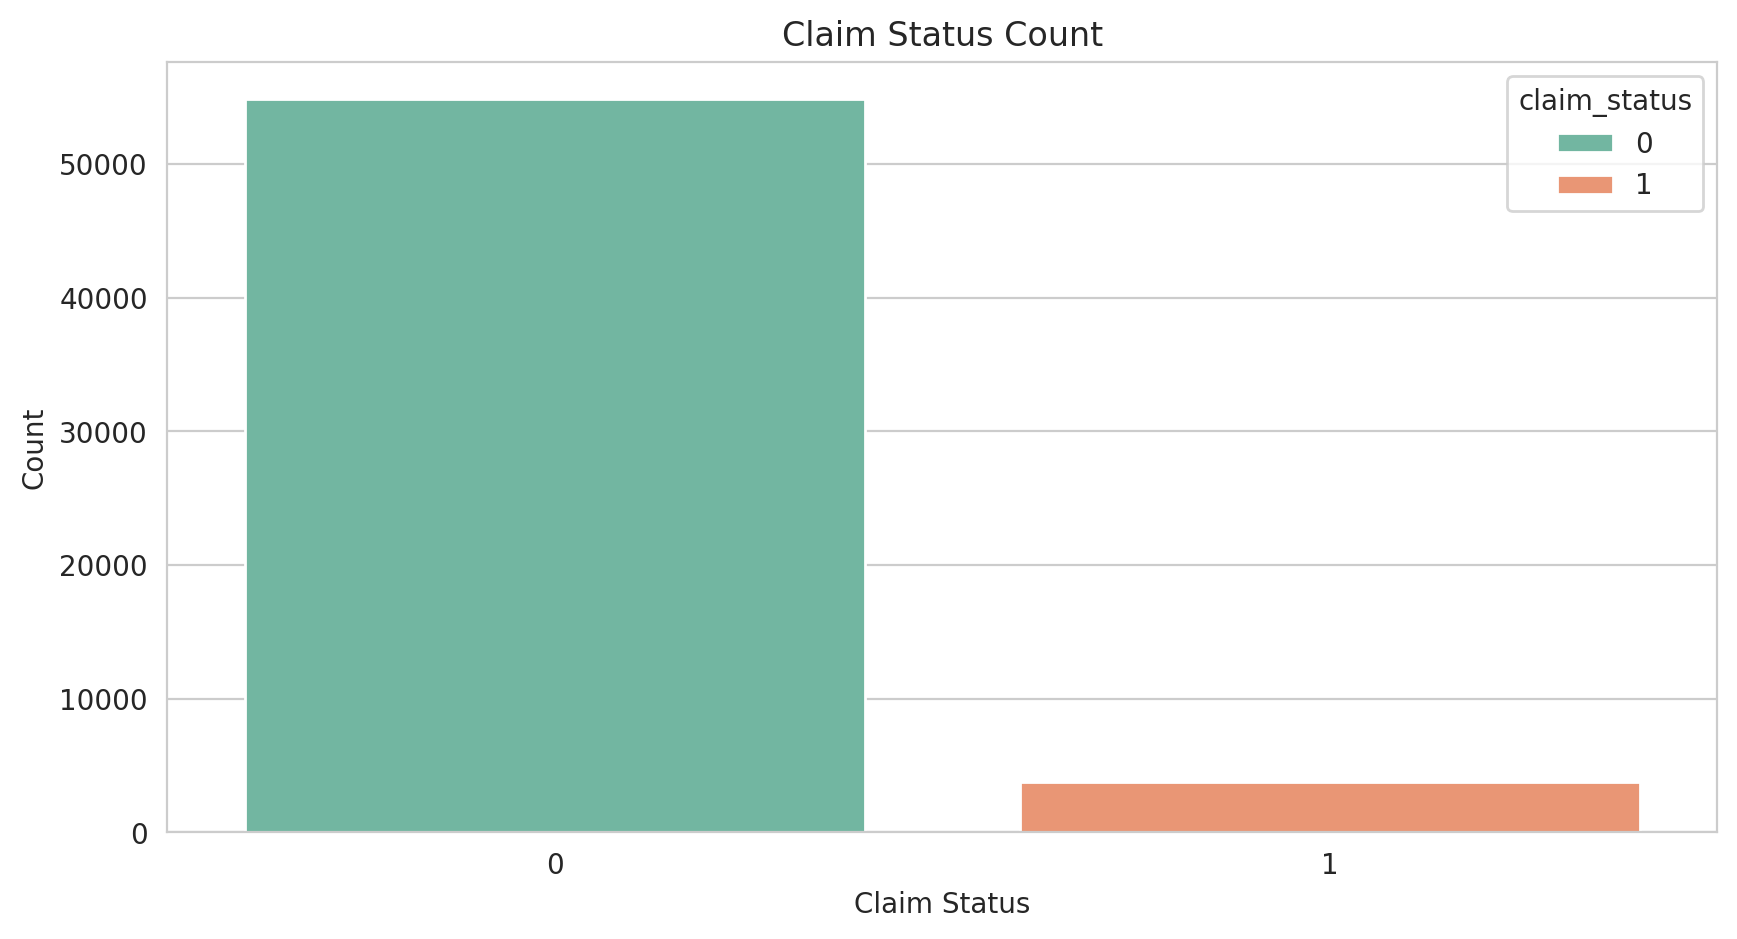

In [ ]:
# create a countplot to visualize the claim_status column

plt.figure(figsize=(10,5))
sns.countplot(x='claim_status', data=df, hue='claim_status', palette="Set2")
plt.title("Claim Status Count")
plt.xlabel("Claim Status")
plt.ylabel("Count")

plt.show()

In this dataset, there is a significant class imbalance, which may affect the model's ability to learn properly and accurately classify instances.

To address the class imbalance issue, we will explore resampling techniques during model training. Resampling involves modifying the distribution of the training data to balance the classes.

Two common resampling techniques are:

1. **Oversampling**: This involves increasing the number of instances in the minority class by duplicating or creating synthetic samples. Popular oversampling methods include Random Oversampling and Synthetic Minority Over-sampling Technique (SMOTE).

2. **Undersampling**: This involves reducing the number of instances in the majority class by randomly removing samples. Common undersampling methods include Random Undersampling and Tomek Links.

In [ ]:
# checking columns with int and float datatypes

numerical_col = df.select_dtypes(exclude='object').columns
numerical_col

Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
       'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
       'width', 'gross_weight', 'ncap_rating', 'claim_status'],
      dtype='object')

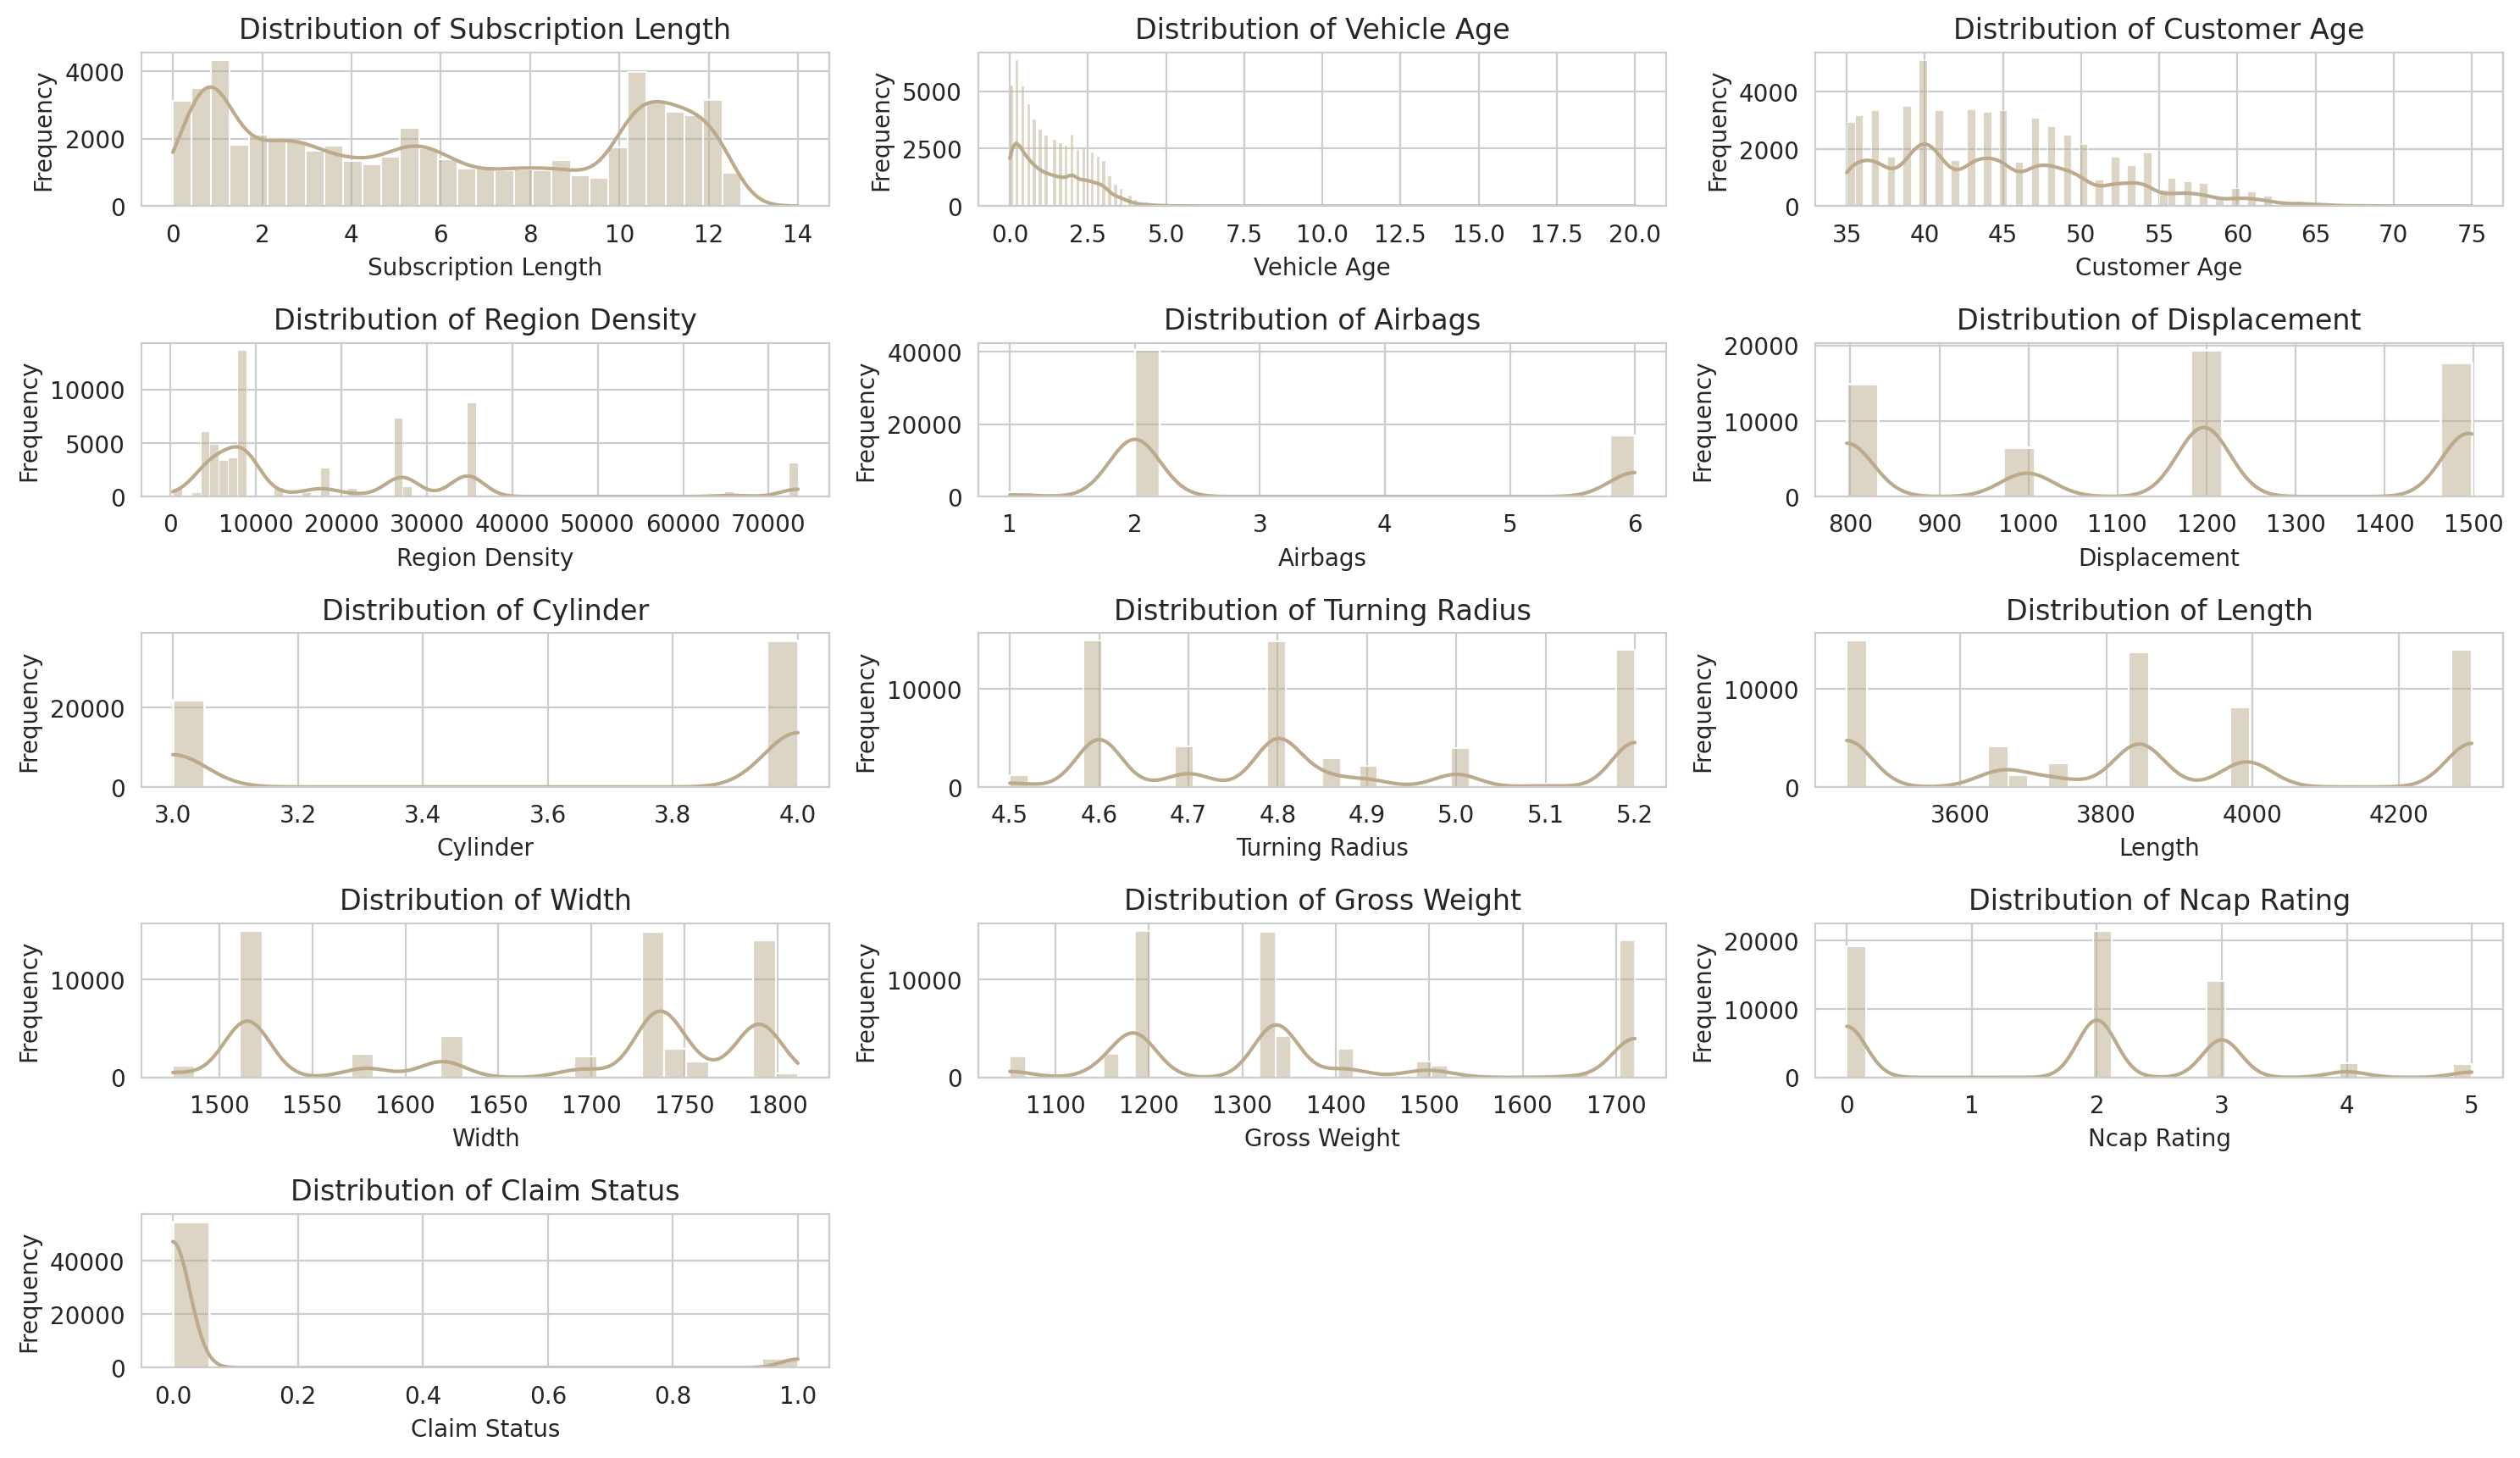

In [ ]:
# visualize the numerical columns and their distribution

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(len(numerical_col) // 2, 3, i)
    sns.histplot(data=df, x=col, color='#BBAB8C', kde=True)
    plt.title(f'Distribution of {" " .join([nc.title() for nc in col.split("_")])}')
    plt.xlabel(f'{" ".join([nc.title() for nc in col.split("_")])}')
    plt.ylabel("Frequency")
plt.tight_layout()

plt.show()


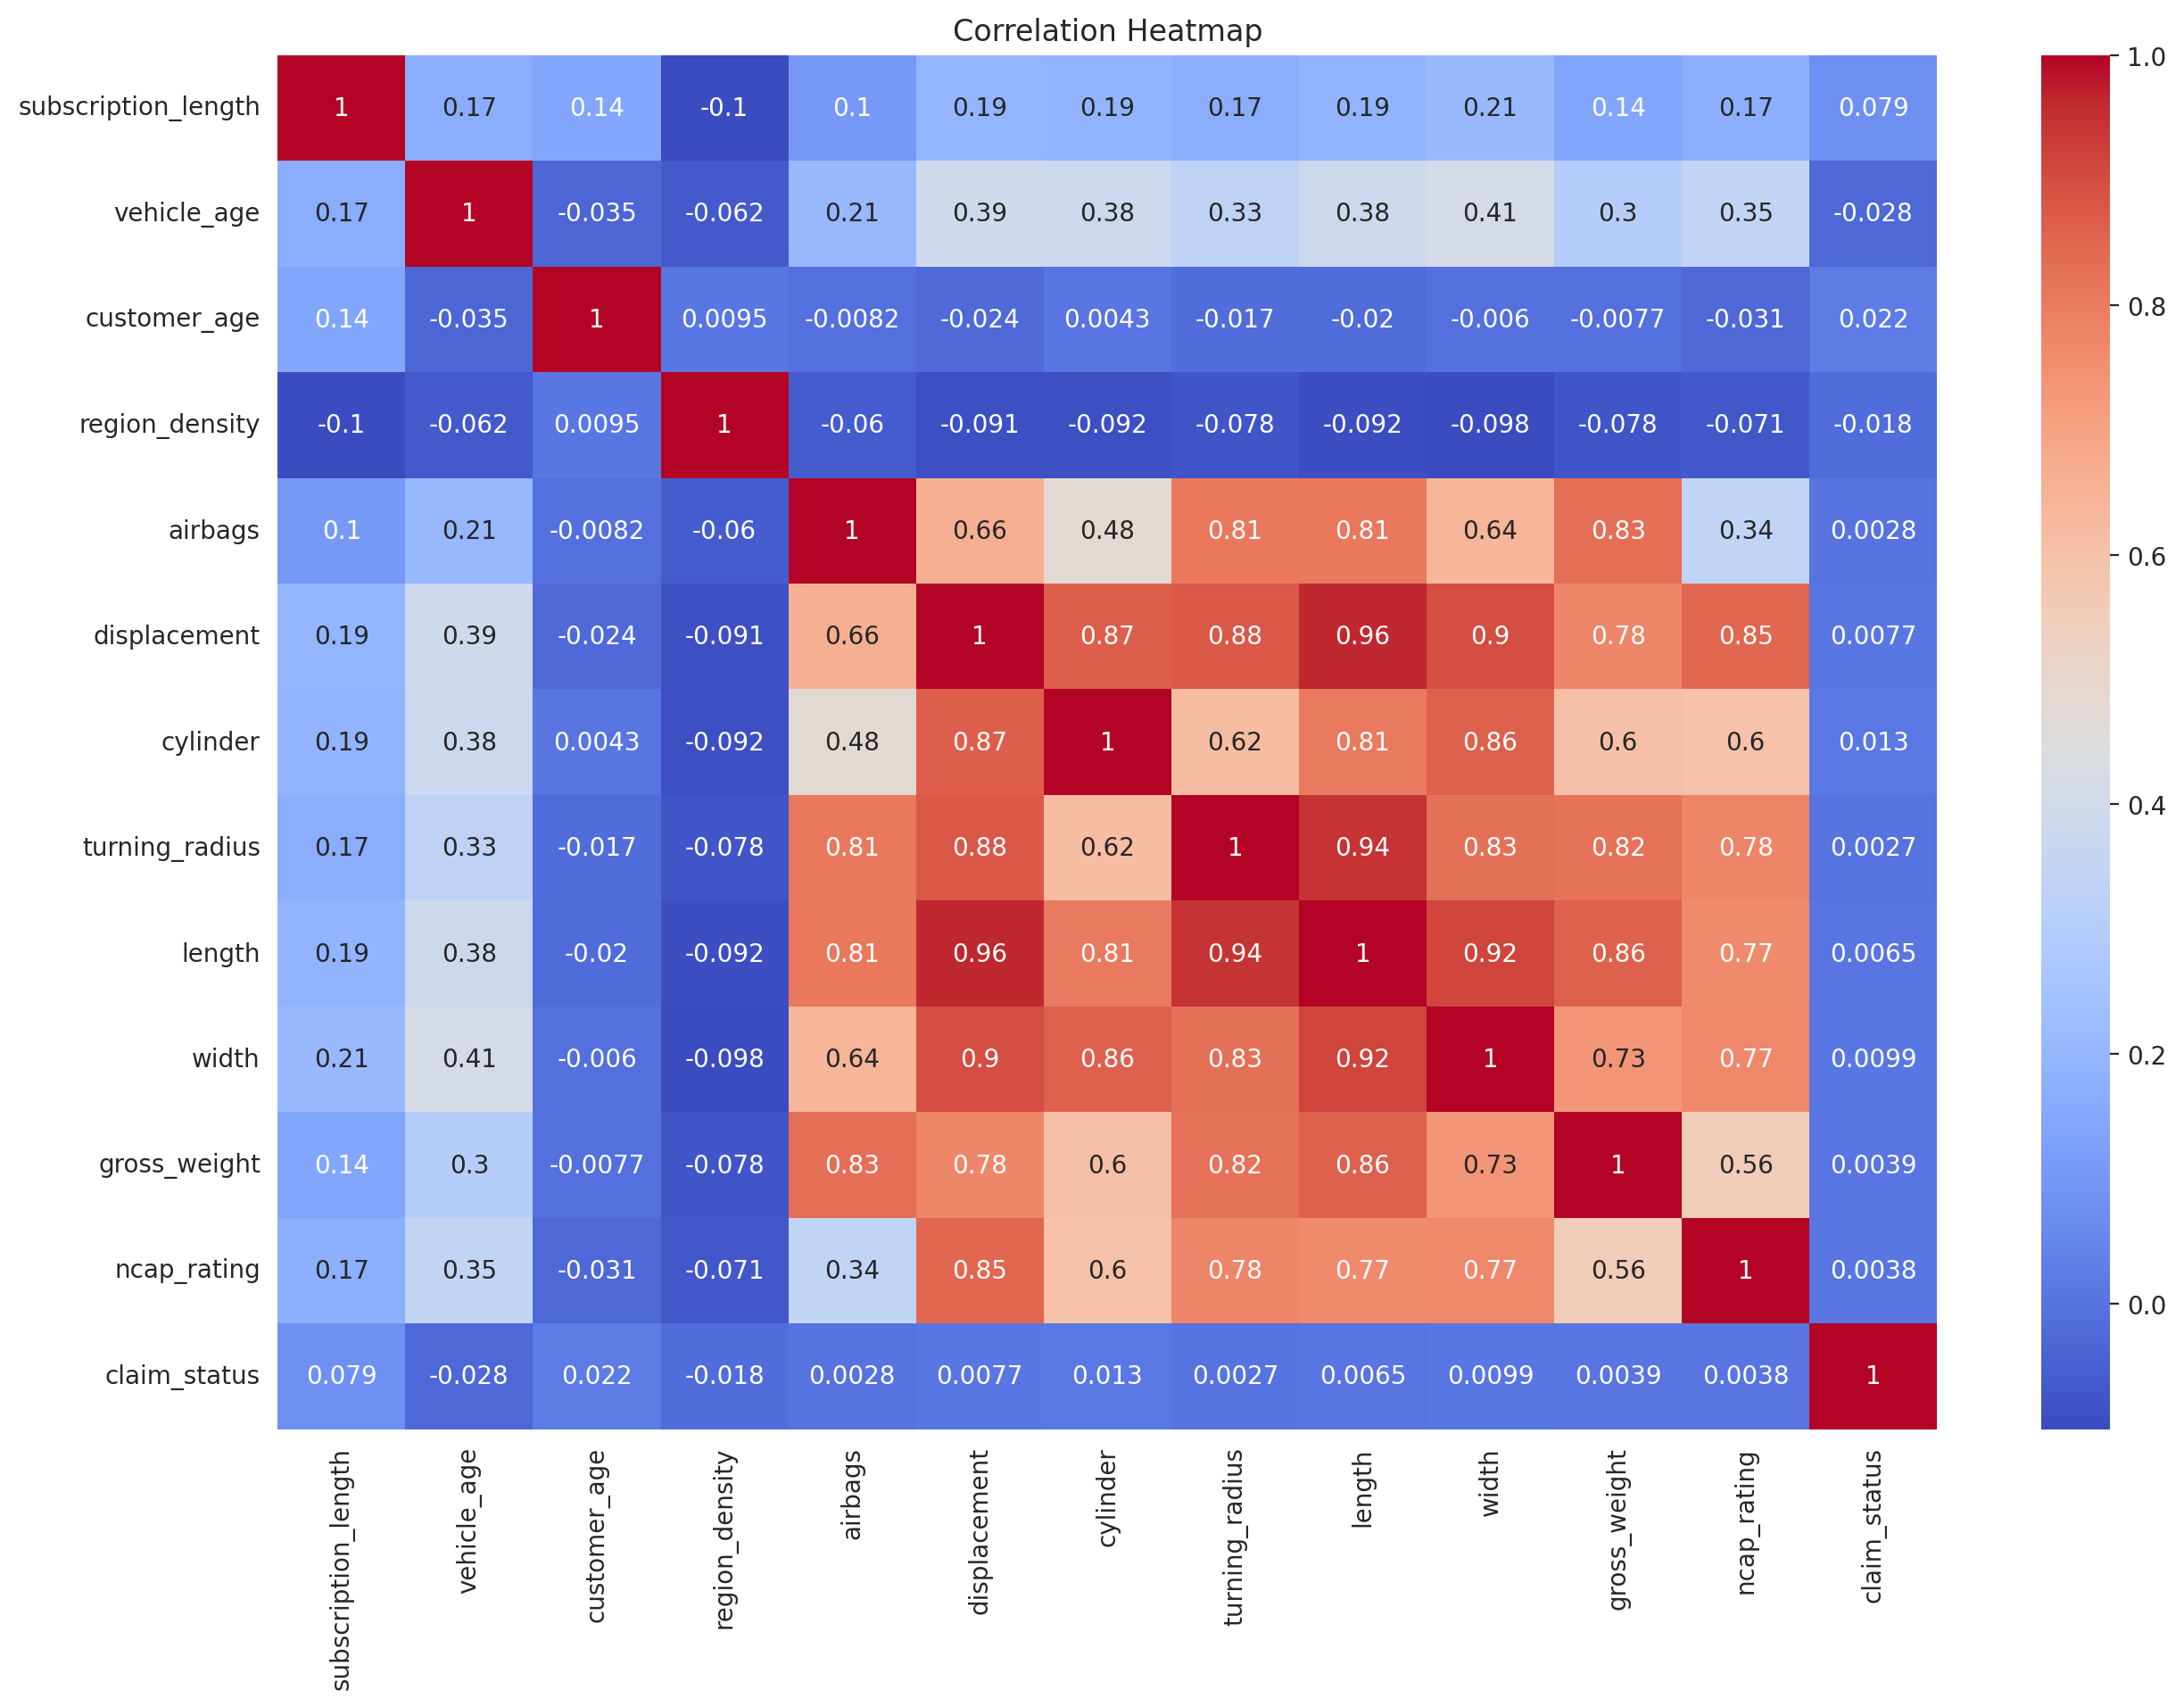

In [ ]:
# creating a heatmap to visualize the correlation between the columns

plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Specifying a list of categorical columns
categorical_columns = ['region_code', 'segment', 'fuel_type']

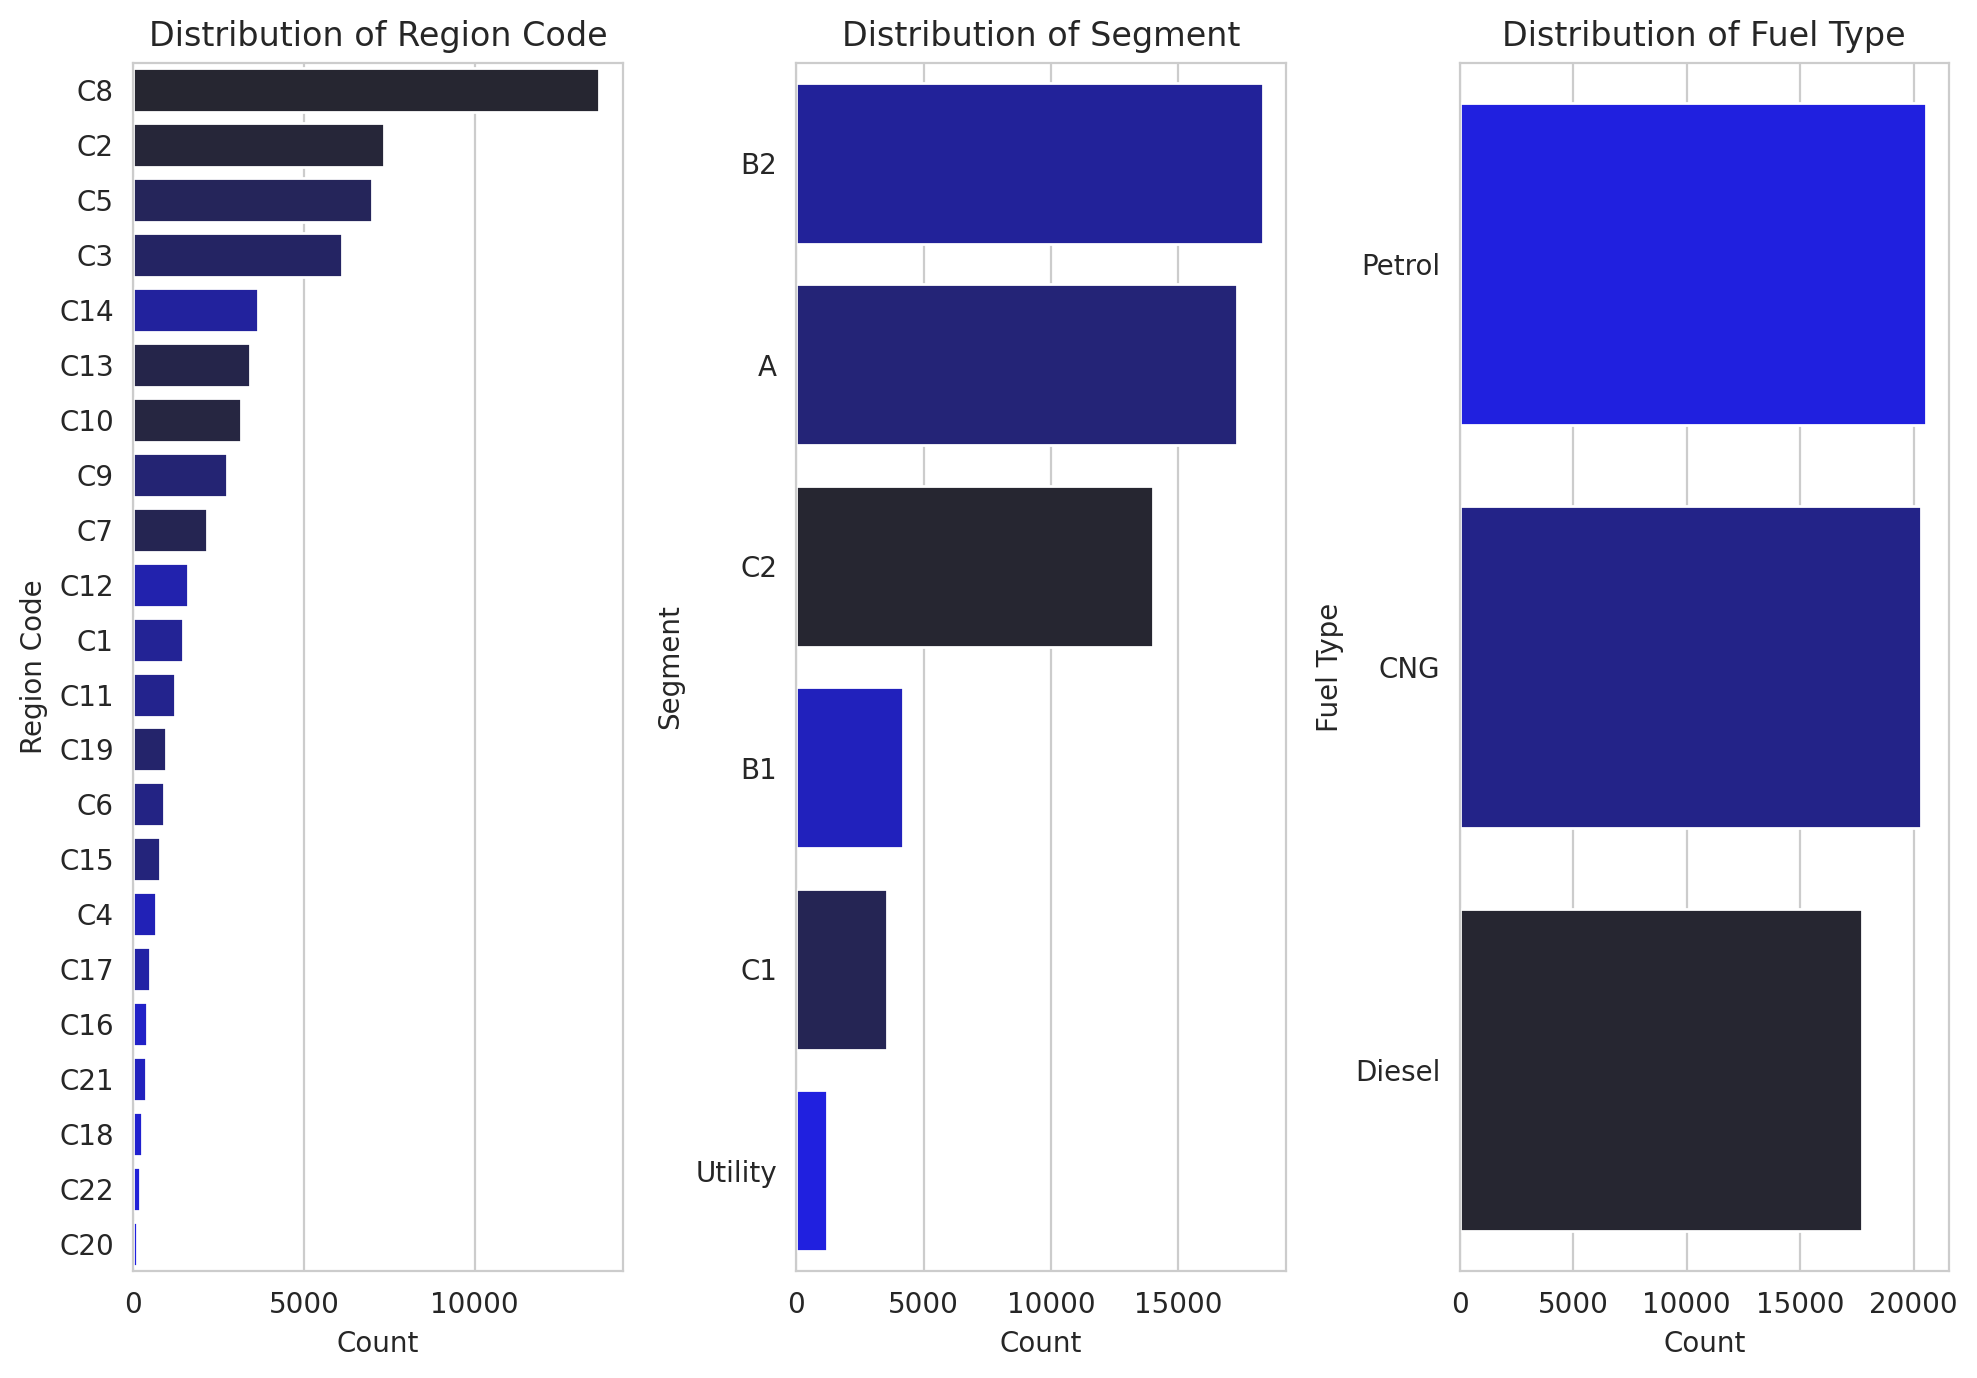

In [ ]:
# Creating subplots to visualize the distribution of categorical columns
plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=col, color='blue')
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel('Count')
    plt.ylabel(f'{" ".join([nc.title() for nc in col.split("_")])}')
plt.tight_layout()
plt.show()

### 3. Oversampling the Minority Class

In [ ]:
# Creating subsets of the DataFrame based on the 'claim_status' column:
# - 'minority' contains rows where 'claim_status' is equal to 1
# - 'majority' contains rows where 'claim_status' is equal to 0
minority = df[df['claim_status'] == 1]
majority = df[df['claim_status'] == 0]

In [ ]:
# check first few values of each new subset
majority.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
minority.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
12,10.2,1.6,41,C2,27003,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
29,10.9,2.0,41,C10,73430,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
76,12.2,0.4,41,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,1
81,11.1,1.0,57,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
84,1.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,1


In [ ]:
# oversampling the minority subset to balance out the dataset

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

In [ ]:
# concat the majoriy class with oversampled minority class to create balanced ds

balanced_df = pd.concat([majority, minority_upsampled])
balanced_df.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
# counting the number of occurrences of each class in each 'claim_status' column

balanced_df['claim_status'].value_counts()

,count
claim_status,
0,54844
1,54844


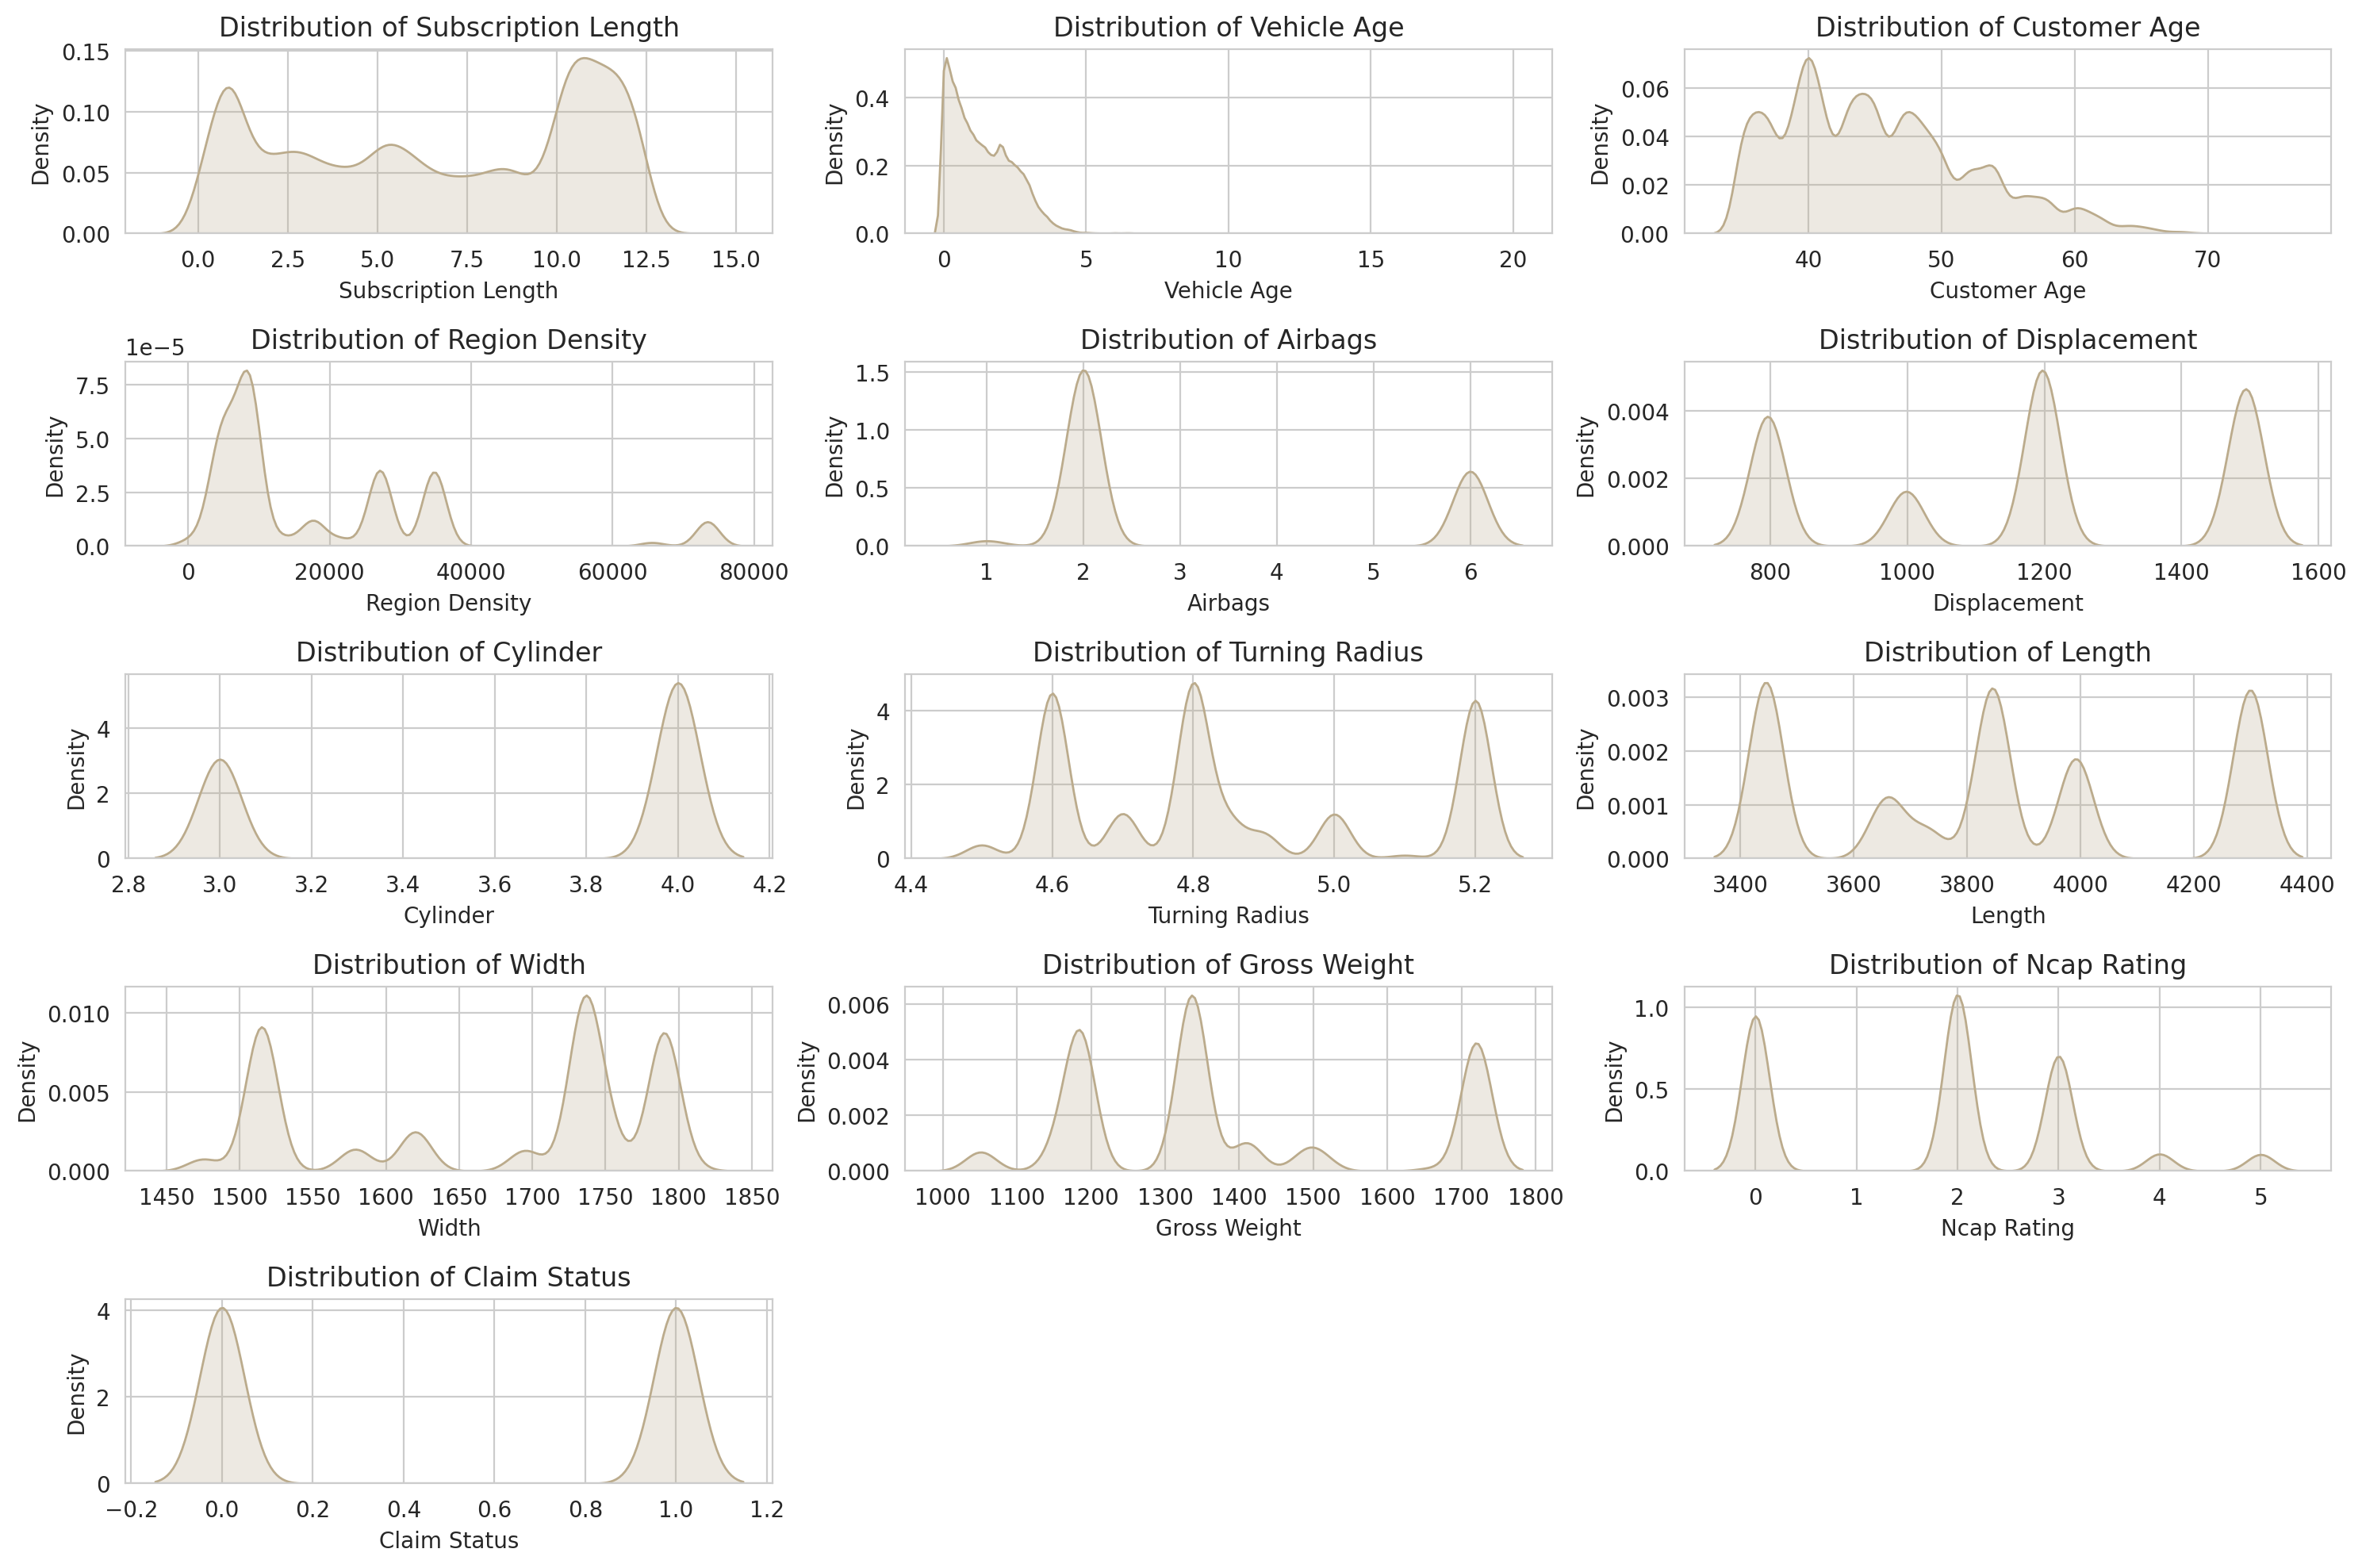

In [ ]:
# creating subplots to visualize the dist. of numerical columns with KDE plots

plt.figure(figsize=(15, 10))

num_rows = int(np.ceil(len(numerical_col) / 3))
for i, col in enumerate(numerical_col, 1):
    plt.subplot(num_rows, 3, i)
    sns.kdeplot(data=balanced_df, x=col, color='#BBAB8C', fill=True)
    plt.xlabel(f'{" ".join([nc.title() for nc in col.split("_")])}')
    plt.ylabel('Density')
    plt.title(f'Distribution of {" ".join([nc.title() for nc in col.split("_")])}')

plt.tight_layout()

plt.show()

**Conclusion:**

The distribution of the claim_status target variable after oversampling is as follows:

Class 0: 54844 instances\
Class 1: 54844 instances

This balanced distribution indicates that the oversampling technique has effectively addressed the class imbalance issue in the dataset. With an equal number of instances for both classes, we can now proceed to train our predictive model on the balanced dataset, ensuring that both classes are adequately represented and the model can learn from both types of instances effectively.

### 4. Feature Engineering

In [ ]:
# Initialize the Label encoder

label_encoder = LabelEncoder()

# apply label encoder to every column with dtype='object'

encoded_data = df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)


In [ ]:
encoded_data.head()

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,0,1,1,1,1,1,1,1,4,0
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,0,1,1,1,0,0,1,1,5,0


In [ ]:
from re import X
# separating train and test columns

X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

In [ ]:
# instantiate the RFC

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# getting feature importance from the trained RF model

feature_importance = rfc.feature_importances_

In [ ]:
# create a new df to store the feature names and corresponding names

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# sort the importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# display the top 10 features
feature_importance_df.head(10)

,Feature,Importance
0,subscription_length,0.417150
2,customer_age,0.263397
1,vehicle_age,0.193724
4,region_density,0.059310
3,region_code,0.058201
6,model,0.000672
23,length,0.000639
24,width,0.000591
22,turning_radius,0.000504
25,gross_weight,0.000491


These results indicate that ***subscription length, customer age, and vehicle age*** are the most influential features in predicting insurance claims likelihood. Factors such as region density and region code also contribute to the predictive power, albeit to a lesser extent.

In [ ]:
# separating the features from the oversampled dataset

X_balanced = balanced_df.drop('claim_status', axis=1)
y_balanced = balanced_df['claim_status']